In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
EC=pd.read_csv(r"C:\Users\adity\OneDrive\Desktop\Data Analytics projects\sales project\ecommerce dataset\project1_df.csv")

In [6]:
EC

,CID,TID,Gender,Age Group,Purchase Date,Product Category,Discount Availed,Discount Name,Discount Amount (INR),Gross Amount,Net Amount,Purchase Method,Location
0,943146,5876328741,Female,25-45,30-08-2023 20:27,Electronics,Yes,FESTIVE50,64.30,725.304000,661.004000,Credit Card,Ahmedabad
1,180079,1018503182,Male,25-45,23-02-2024 09:33,Electronics,Yes,SEASONALOFFER21,175.19,4638.991875,4463.801875,Credit Card,Bangalore
2,337580,3814082218,Other,60 and above,06-03-2022 09:09,Clothing,Yes,SEASONALOFFER21,211.54,1986.372575,1774.832575,Credit Card,Delhi
3,180333,1395204173,Other,60 and above,04-11-2020 04:41,Sports & Fitness,No,NaN,0.00,5695.612650,5695.612650,Debit Card,Delhi
4,447553,8009390577,Male,18-25,31-05-2022 17:00,Sports & Fitness,Yes,WELCOME5,439.92,2292.651500,1852.731500,Credit Card,Delhi
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54995,295864,5407639888,Other,25-45,23-02-2020 10:42,Electronics,Yes,SEASONALOFFER21,110.89,2819.907300,2709.017300,Debit Card,Other
54996,706435,1144029904,Other,18-25,12-07-2021 15:59,Electronics,Yes,SEASONALOFFER21,488.59,3891.303900,3402.713900,Cash on Delivery,Bangalore
54997,649435,9587323189,Male,45-60,02-08-2024 09:30,Home & Kitchen,Yes,NEWYEARS,417.63,4094.687500,3677.057500,Credit Card,Mumbai
54998,982183,5032564481,Female,45-60,05-08-2020 23:57,Beauty and Health,Yes,SEASONALOFFER21,204.56,3977.473500,3772.913500,Credit Card,Kolkata


In [7]:
EC.shape

(55000, 13)

In [8]:
EC.isnull().sum()

CID                          0
TID                          0
Gender                       0
Age Group                    0
Purchase Date                0
Product Category             0
Discount Availed             0
Discount Name            27585
Discount Amount (INR)        0
Gross Amount                 0
Net Amount                   0
Purchase Method              0
Location                     0
dtype: int64

In [9]:
EC["Discount Name"].mode()

0    NEWYEARS
Name: Discount Name, dtype: object

In [10]:
EC["Discount Name"].fillna(EC["Discount Name"].mode()[0],inplace=True)

In [11]:
EC.isnull().sum()

CID                      0
TID                      0
Gender                   0
Age Group                0
Purchase Date            0
Product Category         0
Discount Availed         0
Discount Name            0
Discount Amount (INR)    0
Gross Amount             0
Net Amount               0
Purchase Method          0
Location                 0
dtype: int64

In [12]:
EC.dtypes

CID                        int64
TID                        int64
Gender                    object
Age Group                 object
Purchase Date             object
Product Category          object
Discount Availed          object
Discount Name             object
Discount Amount (INR)    float64
Gross Amount             float64
Net Amount               float64
Purchase Method           object
Location                  object
dtype: object

In [13]:
EC["Purchase Date"]=pd.to_datetime(EC["Purchase Date"])

In [14]:
EC.dtypes

CID                               int64
TID                               int64
Gender                           object
Age Group                        object
Purchase Date            datetime64[ns]
Product Category                 object
Discount Availed                 object
Discount Name                    object
Discount Amount (INR)           float64
Gross Amount                    float64
Net Amount                      float64
Purchase Method                  object
Location                         object
dtype: object

In [15]:
EC[['Age Group','Age Group','Discount Amount (INR)','Gross Amount','Net Amount']].describe()

,Discount Amount (INR),Gross Amount,Net Amount
count,55000.000000,55000.000000,55000.000000
mean,136.986796,3012.936606,2875.949810
std,165.375502,1718.431066,1726.127778
min,0.000000,136.454325,-351.119775
25%,0.000000,1562.111325,1429.551862
50%,0.000000,2954.266150,2814.910875
75%,274.115000,4342.221675,4211.407837
max,500.000000,8394.825600,8394.825600


# Exploratory Data Analysis

### Gender

In [18]:
EC.columns

Index(['CID', 'TID', 'Gender', 'Age Group', 'Purchase Date',
       'Product Category', 'Discount Availed', 'Discount Name',
       'Discount Amount (INR)', 'Gross Amount', 'Net Amount',
       'Purchase Method', 'Location'],
      dtype='object')

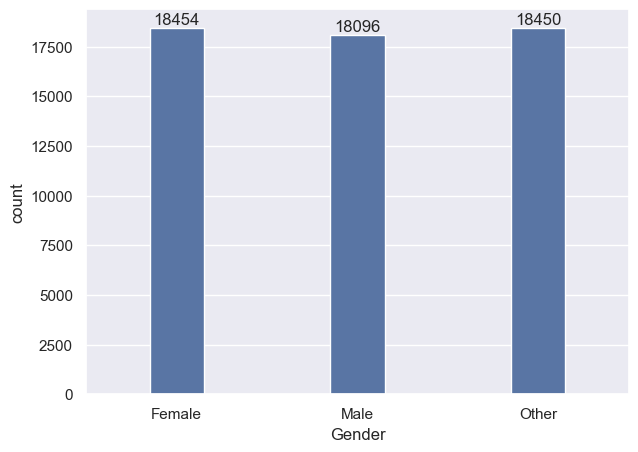

In [20]:
sns.set(rc={"figure.figsize":(7,5)})
ax=sns.countplot(x="Gender",data=EC,width=0.3)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Net Amount'>

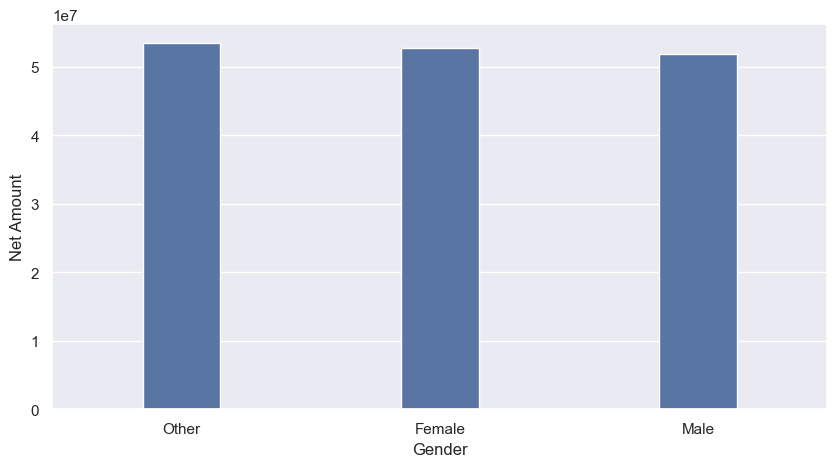

In [67]:
sns.set(rc={'figure.figsize':(10,5)})
sales_gender=EC.groupby(["Gender"],as_index=False)['Net Amount'].sum().sort_values(by='Net Amount',ascending=False)
sns.barplot(x='Gender',y='Net Amount',data=sales_gender,width=0.3)

# Age

In [23]:
EC.columns

Index(['CID', 'TID', 'Gender', 'Age Group', 'Purchase Date',
       'Product Category', 'Discount Availed', 'Discount Name',
       'Discount Amount (INR)', 'Gross Amount', 'Net Amount',
       'Purchase Method', 'Location'],
      dtype='object')

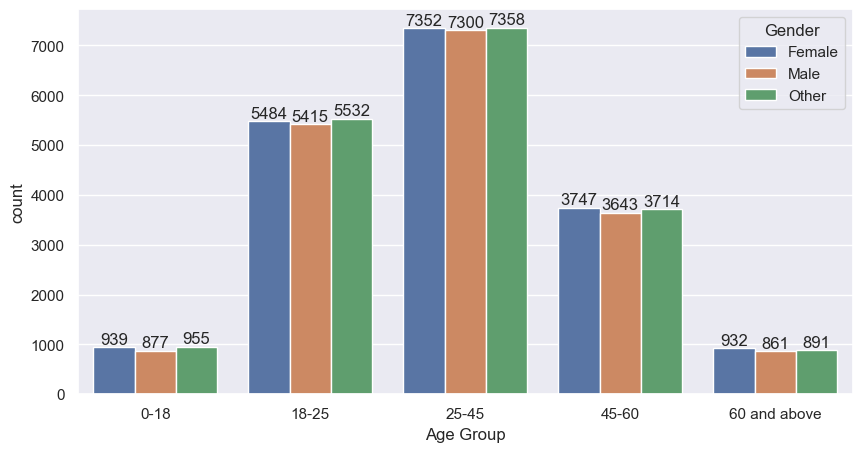

In [24]:
new_df=EC.replace("under 18",value="0-18",inplace=True)
age_group_orde=sorted(EC['Age Group'].unique())
ax=sns.countplot(data=EC,x='Age Group',hue='Gender',order=age_group_orde)
sns.set(rc={"figure.figsize":(22,9)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Net Amount'>

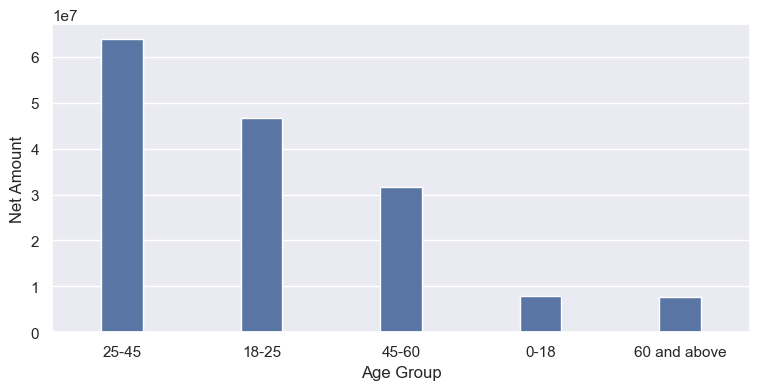

In [25]:
sns.set(rc={'figure.figsize':(9,4)})
sales_age=EC.groupby(['Age Group'],as_index=False)['Net Amount'].sum().sort_values(by='Net Amount',ascending=False)
sns.barplot(x='Age Group',y='Net Amount',data=sales_age,width=0.3)

# Location

In [27]:
EC.columns

Index(['CID', 'TID', 'Gender', 'Age Group', 'Purchase Date',
       'Product Category', 'Discount Availed', 'Discount Name',
       'Discount Amount (INR)', 'Gross Amount', 'Net Amount',
       'Purchase Method', 'Location'],
      dtype='object')

<Axes: xlabel='Location', ylabel='count'>

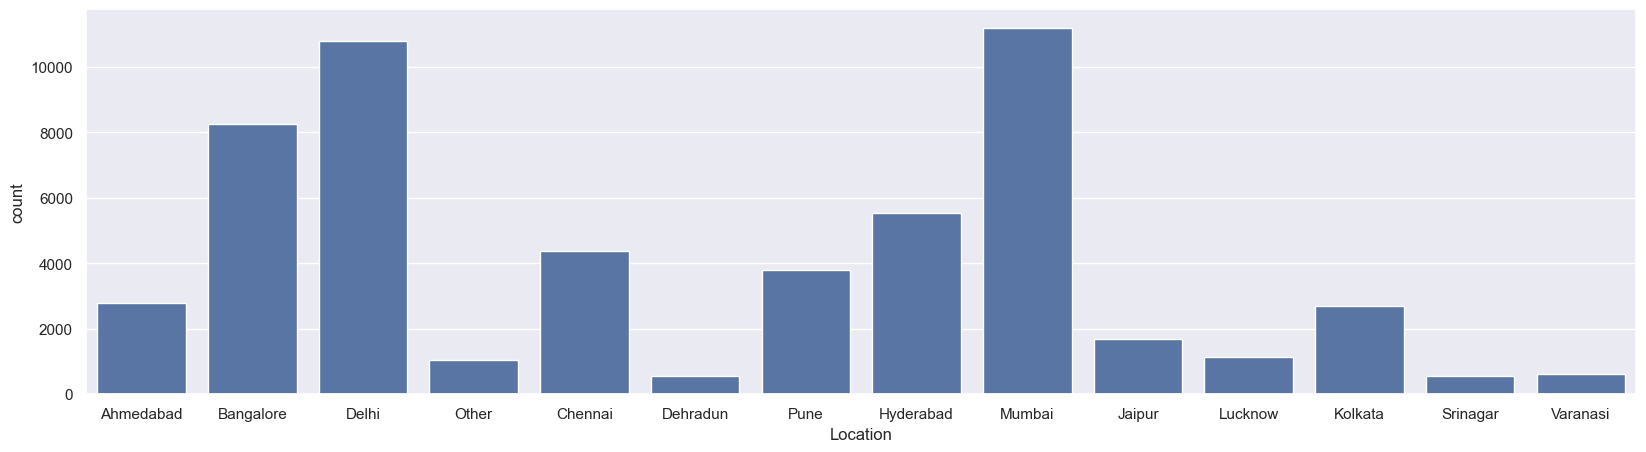

In [28]:
sns.set(rc={"figure.figsize":(20,5)})
sns.countplot(x="Location",data=EC)

<Axes: xlabel='Location', ylabel='Net Amount'>

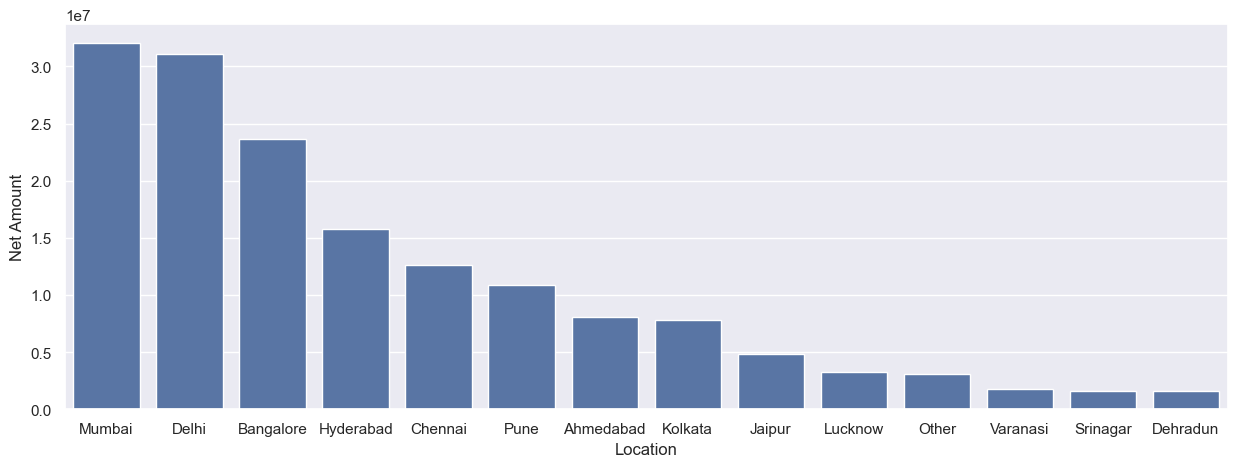

In [29]:
sns.set(rc={'figure.figsize':(15,5)})
area=EC.groupby(['Location'],as_index=False)['Net Amount'].sum().sort_values(by='Net Amount',ascending=False)
sns.barplot(x='Location',y='Net Amount',data=area)

# Product Category

In [31]:
EC.columns

Index(['CID', 'TID', 'Gender', 'Age Group', 'Purchase Date',
       'Product Category', 'Discount Availed', 'Discount Name',
       'Discount Amount (INR)', 'Gross Amount', 'Net Amount',
       'Purchase Method', 'Location'],
      dtype='object')

<Axes: xlabel='Product Category', ylabel='count'>

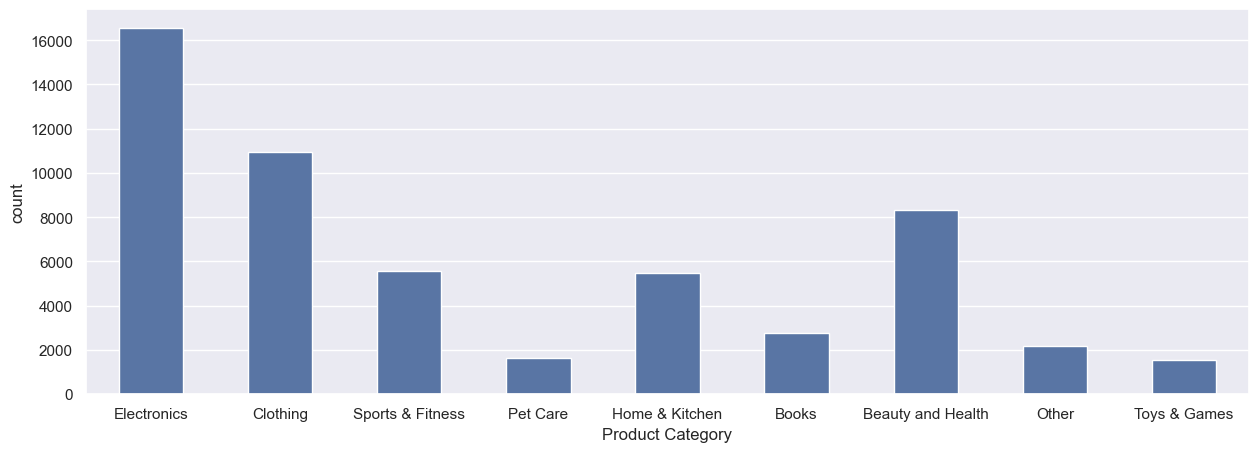

In [32]:
sns.set(rc={"figure.figsize":(15,5)})
sns.countplot(x="Product Category",data=EC,width=0.5)

<Axes: xlabel='Product Category', ylabel='Net Amount'>

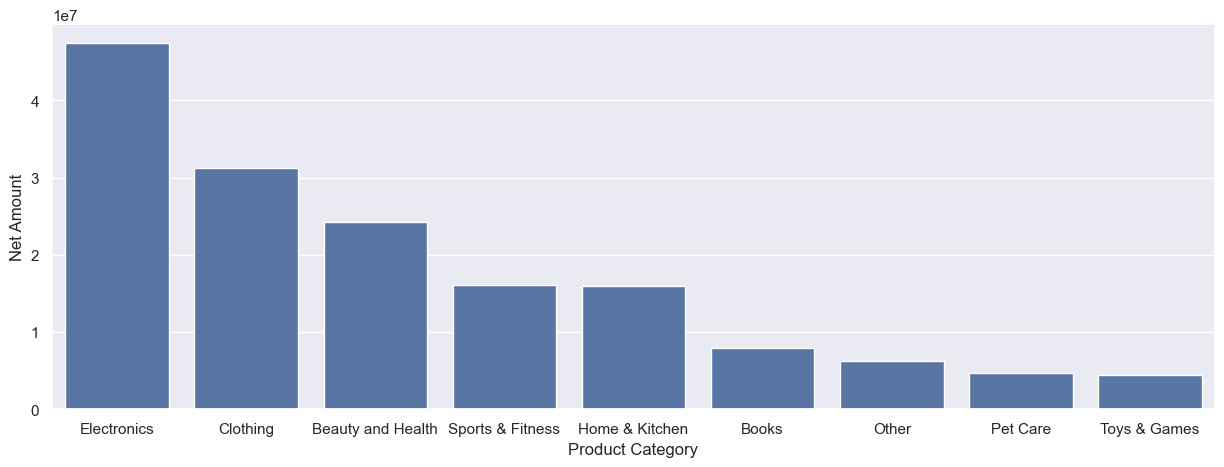

In [33]:
sns.set(rc={'figure.figsize':(15, 5)})
area=EC.groupby(['Product Category'],as_index=False)['Net Amount'].sum().sort_values(by='Net Amount',ascending=False)
sns.barplot(x='Product Category',y='Net Amount',data=area)

# Purchase Method

<Axes: xlabel='Purchase Method', ylabel='count'>

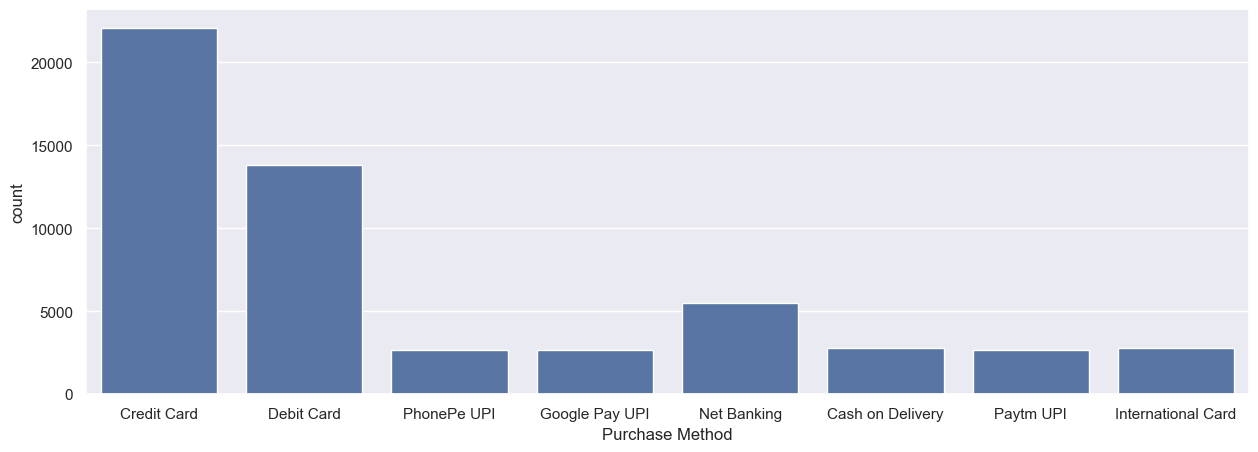

In [37]:
sns.set(rc={"figure.figsize":(15,5)})
sns.countplot(x="Purchase Method",data=EC)

<Axes: xlabel='Purchase Method', ylabel='Net Amount'>

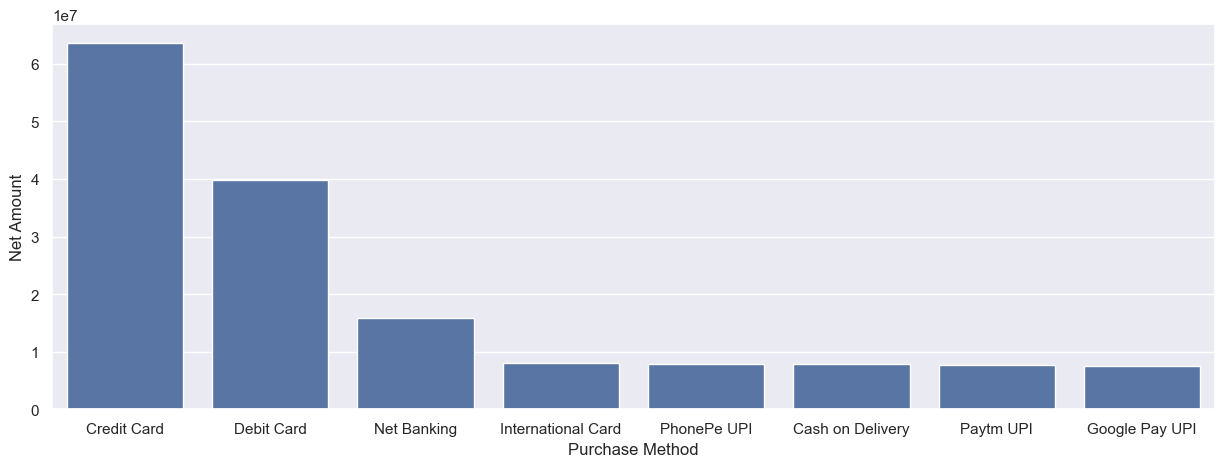

In [39]:
sns.set(rc={'figure.figsize':(15, 5)})
area=EC.groupby(['Purchase Method'],as_index=False)['Net Amount'].sum().sort_values(by='Net Amount',ascending=False)
sns.barplot(x='Purchase Method',y='Net Amount',data=area)